In [1]:
%matplotlib inline

In [2]:
import string

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
sns.set('paper', 'ticks', font_scale=0.9)

col_w = (7. - .25) / 2.
full_w = 7.

def savefig(fig, name):
    fig.savefig('../doc/paper/figures/{}.pdf'.format(name), bbox_inches='tight', pad_inches=0.)
    
def plot_optimum_line(ax, y):
    ax.axhline(y=y, lw=6, c=(.75, .75, .75))

# Load data and do some preprocessing

In [7]:
df = pd.DataFrame({k: np.squeeze(v) for k, v in np.load('../data/170125.npz').iteritems()})

In [8]:
abbrev = {'UsherMcClelland': 'UMcC', 'DriftDiffusion': 'DD'}
df['condition'] = df.apply(lambda x: '{}, {}, {}'.format(
    abbrev[x['network']], x['scale'], x['share_thresholding_intercepts']), axis=1)
cond_order = ['UMcC, 1.0, False', 'DD, 1.0, False', 'DD, 0.2, False', 'DD, 1.0, True', 'DD, 0.2, True']

In [9]:
dfd = df.query('decided == True')

# Number clear decisions

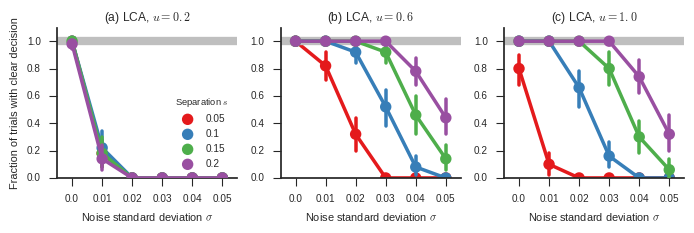

In [10]:
baselines = sorted(df['baseline'].unique())

fig = plt.figure(figsize=(full_w, col_w / 1.4))
ax = None
for i, baseline in enumerate(baselines):
    ax = fig.add_subplot(1, len(baselines), i + 1, sharey=ax)    
    plot_optimum_line(ax, 1.)
    sns.pointplot('noise', 'decided', 'target_sep',
                  data=df.query('network == "UsherMcClelland" and baseline == {}'.format(baseline)),
                  palette='Set1')
    
    ax.set_title("({}) LCA, $u={}$".format(string.ascii_lowercase[i], baseline))
    ax.set_xlabel(r"Noise standard deviation $\sigma$")
    if i == 0:
        ax.set_ylabel("Fraction of trials with clear decision")
    else:
        ax.set_ylabel("")
    
    if i == 0:
        ax.get_legend().set_title("Separation $s$")
    else:
        ax.legend().remove()

ax.set_ylim(0., 1.1)
sns.despine()
fig.tight_layout()

In [11]:
savefig(fig, 'decisions')

# Correct trials

In [12]:
x = df.query('network == "UsherMcClelland"')
np.mean(x['correct'] == x['decided'])

1.0

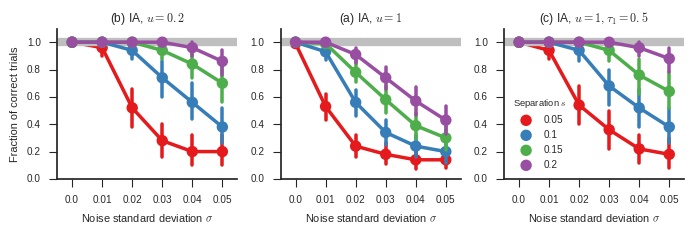

In [31]:
fig = plt.figure(figsize=(full_w, col_w / 1.4))
datasets = [
    df.query('network == "DriftDiffusion" and baseline == .2 and scale == 1. and not share_thresholding_intercepts'),
    df.query('network == "DriftDiffusion" and baseline == 1. and scale == 1.'),
    df.query('network == "DriftDiffusion" and baseline == 1. and scale == .2 and not share_thresholding_intercepts'),
    #df.query('network == "DriftDiffusion" and baseline == 1. and scale == .2 and share_thresholding_intercepts'),
]
titles = [
    r"(b) IA, $u = 0.2$",
    r"(a) IA, $u = 1$",
    r"(c) IA, $u = 1, \tau_1 = 0.5$",
    #r"(d) IA, $u = 1, \tau_1 = 0.5$, identical layer 2 populations",
]

ax=None
for i, (title, data) in enumerate(zip(titles, datasets)):
    ax = plt.subplot(1, 3, i + 1, sharey=ax)
    ax.axhline(y=1., lw=6, c=(0.75, 0.75, 0.75))
    sns.pointplot('noise', 'correct', 'target_sep', data=data, palette='Set1')
    if i == 2:
        ax.get_legend().set_title("Separation $s$")
    else:
        ax.legend().remove()
        
    plt.ylim(0, 1.1)
    plt.title(title)
    plt.xlabel(r"Noise standard deviation $\sigma$")

    if i == 0:
        plt.ylabel("Fraction of correct trials")
    else:
        plt.ylabel("")

sns.despine()
plt.tight_layout()

In [32]:
savefig(fig, 'correct')

# Decision times

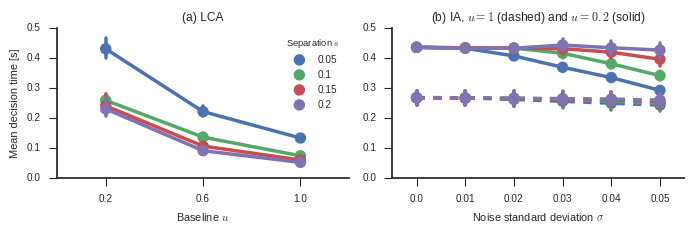

In [17]:
fig = plt.figure(figsize=(full_w, col_w / 1.4))

ax = plt.subplot(1, 2, 1)
sns.pointplot('baseline', 't', 'target_sep', data=dfd.query('network == "UsherMcClelland"'))
ax.set_title("(a) LCA")
ax.set_xlabel("Baseline $u$")
ax.set_ylabel("Mean decision time [s]")
ax.get_legend().set_title("Separation $s$")

ax = plt.subplot(1, 2, 2, sharey=ax)
sns.pointplot('noise', 't', 'target_sep', data=dfd.query('network == "DriftDiffusion" and baseline == 0.2'))
sns.pointplot('noise', 't', 'target_sep', data=dfd.query('network == "DriftDiffusion" and baseline == 1'),
              linestyles='--')
ax.set_title("(b) IA, $u = 1$ (dashed) and $u = 0.2$ (solid)")
ax.set_xlabel(r"Noise standard deviation $\sigma$")
ax.set_ylabel("")
ax.legend().remove()

sns.despine()
fig.tight_layout()

In [18]:
savefig(fig, 'time')

# Transient response

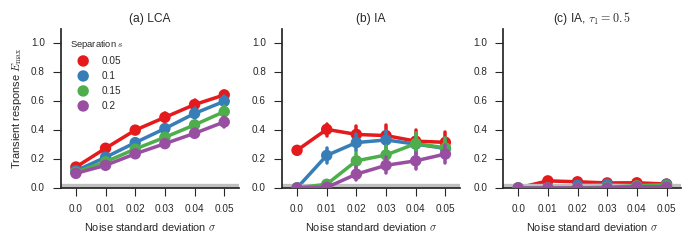

In [19]:
fig = plt.figure(figsize=(full_w, full_w / 2. / 1.4))

plt.subplot(1, 3, 1)
sns.pointplot('noise', 'runnerup_highest_err', 'target_sep', data=df.query('network == "UsherMcClelland" and baseline == 1.'),
              palette='Set1')
plt.axhline(y=0., lw=6, c=(0.75, 0.75, 0.75))
plt.ylim(0, 1.1)
plt.title("(a) LCA")
plt.xlabel(r"Noise standard deviation $\sigma$")
plt.ylabel("Transient response $E_{\mathrm{max}}$")
plt.gca().get_legend().set_title("Separation $s$")
sns.despine()

plt.subplot(1, 3, 2)
sns.pointplot('noise', 'runnerup_highest_err', 'target_sep', data=df.query('network == "DriftDiffusion" and scale == 1. and baseline == 1.'),
              palette='Set1')
plt.axhline(y=0., lw=6, c=(0.75, 0.75, 0.75))
plt.ylim(0, 1.1)
plt.title("(b) IA")
plt.xlabel(r"Noise standard deviation $\sigma$")
plt.ylabel("")
plt.gca().legend().remove()
sns.despine()

plt.subplot(1, 3, 3)
sns.pointplot('noise', 'runnerup_highest_err', 'target_sep', data=df.query('network == "DriftDiffusion" and scale == .2 and baseline == 1.'),
              palette='Set1')
plt.axhline(y=0., lw=6, c=(0.75, 0.75, 0.75))
plt.ylim(0, 1.1)
plt.title(r"(c) IA, $\tau_1 = 0.5$")
plt.xlabel(r"Noise standard deviation $\sigma$")
plt.ylabel("")
plt.gca().legend().remove()
sns.despine()

plt.tight_layout()

In [20]:
savefig(fig, 'transient')

In [24]:
df.query('network == "UsherMcClelland" and baseline == 1. and target_sep == 0.2 and noise == 0.').mean()

baseline                          1.000000
correct                           1.000000
decided                           1.000000
noise                             0.000000
runnerup_highest_err              0.100798
scale                             1.000000
seed                             24.500000
share_thresholding_intercepts     0.000000
t                                 0.048300
target_sep                        0.200000
dtype: float64

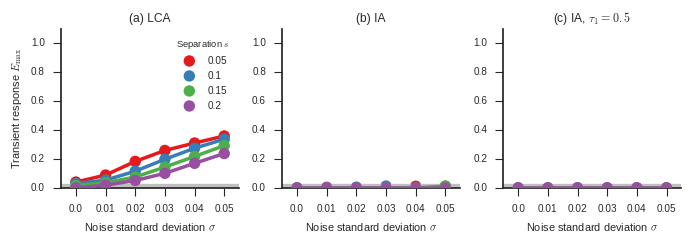

In [26]:
fig = plt.figure(figsize=(full_w, full_w / 2. / 1.4))

plt.subplot(1, 3, 1)
sns.pointplot('noise', 'runnerup_highest_err', 'target_sep', data=df.query('network == "UsherMcClelland" and baseline == .2'),
              palette='Set1')
plt.axhline(y=0., lw=6, c=(0.75, 0.75, 0.75))
plt.ylim(0, 1.1)
plt.title("(a) LCA")
plt.xlabel(r"Noise standard deviation $\sigma$")
plt.ylabel("Transient response $E_{\mathrm{max}}$")
plt.gca().get_legend().set_title("Separation $s$")
sns.despine()

plt.subplot(1, 3, 2)
sns.pointplot('noise', 'runnerup_highest_err', 'target_sep', data=df.query('network == "DriftDiffusion" and scale == 1. and baseline == .2'),
              palette='Set1')
plt.axhline(y=0., lw=6, c=(0.75, 0.75, 0.75))
plt.ylim(0, 1.1)
plt.title("(b) IA")
plt.xlabel(r"Noise standard deviation $\sigma$")
plt.ylabel("")
plt.gca().legend().remove()
sns.despine()

plt.subplot(1, 3, 3)
sns.pointplot('noise', 'runnerup_highest_err', 'target_sep', data=df.query('network == "DriftDiffusion" and scale == .2 and baseline == .2'),
              palette='Set1')
plt.axhline(y=0., lw=6, c=(0.75, 0.75, 0.75))
plt.ylim(0, 1.1)
plt.title(r"(c) IA, $\tau_1 = 0.5$")
plt.xlabel(r"Noise standard deviation $\sigma$")
plt.ylabel("")
plt.gca().legend().remove()
sns.despine()

plt.tight_layout()